Observe time difference for training both models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

X, y = digits.data, digits.target

In [3]:
X[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [4]:
X[1].shape

(64,)

In [5]:
y[1]

1

<Figure size 432x288 with 0 Axes>

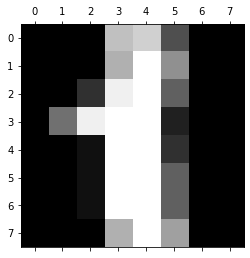

In [6]:
plt.gray()
plt.matshow(digits.images[1])

plt.show() 

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

We need to run below cell to remove all future warnings

from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

Note = n_jobs= -1 (here -1 represents maximum parallelism available by hardware)

In [10]:
%timeit single_core_learning = cross_val_score(SVC(gamma = 'auto'), X, y, cv=20, n_jobs=-1)

5.01 s ± 633 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
import os

os.cpu_count()

4

#### Create as many processes as there are CPU cores in your system
Setting n_jobs to -1 will actually set it to a value equal to os.cpu_count()

In [10]:
%timeit multi_core_learning = cross_val_score(SVC(gamma = 'auto'), X, y, cv=20, n_jobs=-1)

4.8 s ± 647 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Use some but not all of the available CPU cores
The performance should be worse, though more CPU cores are available for other tasks running on your system

In [11]:
%timeit multi_core_learning = cross_val_score(SVC(gamma = 'auto'), X, y, cv=20, n_jobs=2)

6.02 s ± 365 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
!pip install dask-ml

     |████████████████████████████████| 143 kB 1.6 MB/s eta 0:00:01


In [12]:
!pip install dask distributed -U

     |████████████████████████████████| 952 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 696 kB 3.8 MB/s eta 0:00:01
  Attempting uninstall: dask
    Found existing installation: dask 2021.4.0
    Uninstalling dask-2021.4.0:
      Successfully uninstalled dask-2021.4.0
  Attempting uninstall: distributed
    Found existing installation: distributed 2021.4.0
    Uninstalling distributed-2021.4.0:
      Successfully uninstalled distributed-2021.4.0


In [13]:
from dask.distributed import Client

from joblib import parallel_backend
from sklearn.model_selection import RandomizedSearchCV

In [14]:
client = Client(processes=False) 

In [15]:
param_space = {
    'C': np.logspace(-6, 6, 13),
    'gamma': np.logspace(-8, 8, 17),
    'tol': np.logspace(-4, -1, 4),
    'class_weight': [None, 'balanced'],
}

model = SVC(kernel='rbf')
search = RandomizedSearchCV(model, param_space, cv=3, n_iter=50, verbose=10)

In [16]:
with parallel_backend('dask'):
    search.fit(digits.data, digits.target)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 2/3; 3/50] START C=1.0, class_weight=balanced, gamma=10000000.0, tol=0.01...
[CV 2/3; 2/50] START C=100000.0, class_weight=None, gamma=0.0001, tol=0.001.....[CV 2/3; 1/50] START C=1000000.0, class_weight=balanced, gamma=1e-06, tol=0.01..
[CV 1/3; 3/50] START C=1.0, class_weight=balanced, gamma=10000000.0, tol=0.01...

[CV 2/3; 1/50] END C=1000000.0, class_weight=balanced, gamma=1e-06, tol=0.01; total time=   0.2s
[CV 3/3; 2/50] START C=100000.0, class_weight=None, gamma=0.0001, tol=0.001.....
[CV 2/3; 2/50] END C=100000.0, class_weight=None, gamma=0.0001, tol=0.001; total time=   0.2s
[CV 3/3; 1/50] START C=1000000.0, class_weight=balanced, gamma=1e-06, tol=0.01..
[CV 3/3; 1/50] END C=1000000.0, class_weight=balanced, gamma=1e-06, tol=0.01; total time=   0.1s
[CV 1/3; 2/50] START C=100000.0, class_weight=None, gamma=0.0001, tol=0.001.....
[CV 3/3; 2/50] END C=100000.0, class_weight=None, gamma=0.0001, tol=0.001; total ti

[CV 1/3; 16/50] END C=1000000.0, class_weight=balanced, gamma=1.0, tol=0.01; total time=   0.6s
[CV 2/3; 17/50] START C=10000.0, class_weight=balanced, gamma=0.1, tol=0.1......
[CV 2/3; 16/50] END C=1000000.0, class_weight=balanced, gamma=1.0, tol=0.01; total time=   0.6s
[CV 3/3; 17/50] START C=10000.0, class_weight=balanced, gamma=0.1, tol=0.1......
[CV 1/3; 17/50] END C=10000.0, class_weight=balanced, gamma=0.1, tol=0.1; total time=   0.6s
[CV 2/3; 18/50] START C=10000.0, class_weight=None, gamma=1000.0, tol=0.001.....
[CV 3/3; 16/50] END C=1000000.0, class_weight=balanced, gamma=1.0, tol=0.01; total time=   0.6s
[CV 1/3; 18/50] START C=10000.0, class_weight=None, gamma=1000.0, tol=0.001.....
[CV 2/3; 17/50] END C=10000.0, class_weight=balanced, gamma=0.1, tol=0.1; total time=   0.6s
[CV 3/3; 18/50] START C=10000.0, class_weight=None, gamma=1000.0, tol=0.001.....
[CV 3/3; 17/50] END C=10000.0, class_weight=balanced, gamma=0.1, tol=0.1; total time=   0.6s
[CV 1/3; 19/50] START C=1e-0

[CV 1/3; 31/50] END C=100000.0, class_weight=None, gamma=0.1, tol=0.01; total time=   0.7s
[CV 1/3; 33/50] START C=10000.0, class_weight=None, gamma=1.0, tol=0.001........
[CV 3/3; 32/50] END C=1000000.0, class_weight=None, gamma=1000.0, tol=0.0001; total time=   0.7s
[CV 2/3; 33/50] START C=10000.0, class_weight=None, gamma=1.0, tol=0.001........
[CV 2/3; 32/50] END C=1000000.0, class_weight=None, gamma=1000.0, tol=0.0001; total time=   0.7s
[CV 1/3; 34/50] START C=0.01, class_weight=balanced, gamma=0.1, tol=0.01........
[CV 1/3; 32/50] END C=1000000.0, class_weight=None, gamma=1000.0, tol=0.0001; total time=   0.7s
[CV 3/3; 33/50] START C=10000.0, class_weight=None, gamma=1.0, tol=0.001........
[CV 1/3; 33/50] END C=10000.0, class_weight=None, gamma=1.0, tol=0.001; total time=   0.7s
[CV 2/3; 34/50] START C=0.01, class_weight=balanced, gamma=0.1, tol=0.01........
[CV 2/3; 33/50] END C=10000.0, class_weight=None, gamma=1.0, tol=0.001; total time=   0.7s
[CV 3/3; 34/50] START C=0.01, c

[CV 2/3; 48/50] END C=0.001, class_weight=None, gamma=1.0, tol=0.1; total time=   0.6s
[CV 3/3; 49/50] START C=0.0001, class_weight=None, gamma=1e-07, tol=0.01........
[CV 3/3; 48/50] END C=0.001, class_weight=None, gamma=1.0, tol=0.1; total time=   0.7s
[CV 2/3; 49/50] START C=0.0001, class_weight=None, gamma=1e-07, tol=0.01........
[CV 1/3; 48/50] END C=0.001, class_weight=None, gamma=1.0, tol=0.1; total time=   0.7s
[CV 1/3; 49/50] START C=0.0001, class_weight=None, gamma=1e-07, tol=0.01........
[CV 3/3; 47/50] END C=0.0001, class_weight=balanced, gamma=1e-07, tol=0.1; total time=   0.7s
[CV 1/3; 50/50] START C=0.0001, class_weight=None, gamma=100.0, tol=0.01........
[CV 3/3; 49/50] END C=0.0001, class_weight=None, gamma=1e-07, tol=0.01; total time=   0.7s
[CV 3/3; 50/50] START C=0.0001, class_weight=None, gamma=100.0, tol=0.01........
[CV 2/3; 49/50] END C=0.0001, class_weight=None, gamma=1e-07, tol=0.01; total time=   0.7s
[CV 2/3; 50/50] START C=0.0001, class_weight=None, gamma=1